In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abhishekgd96/Recommendation-System/main/book(1).csv', encoding='latin-1')
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
data = data.iloc[:,1:]
data

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [4]:
#number of unique users in the dataset
len(data['User.ID'].unique())

2182

In [5]:
len(data['Book.Title'].unique())

9659

In [6]:
data = data.sort_values('User.ID').reset_index()
data = data.iloc[:,1:]

In [7]:
data

,User.ID,Book.Title,Book.Rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
...,...,...,...
9995,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
9996,278854,Celtic Mythology (Library of the World's Myths...,8
9997,278854,A corrente de Trewis Scott,7
9998,278854,As valkÃ­rias,7


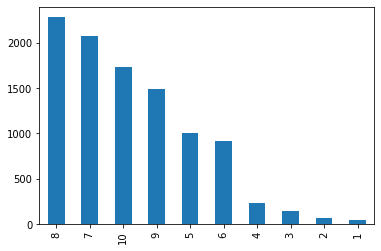

In [8]:
data['Book.Rating'].value_counts().plot(kind='bar')

In [9]:
user_df = data.pivot_table(index='User.ID',columns='Book.Title',values='Book.Rating').reset_index(drop=True)
user_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Impute those NaNs with 0 values
user_df.fillna(0, inplace=True)
user_df

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Calculating Cosine as well as Pairwise_Distances Similarity between Users

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [12]:
user_sim = 1 - pairwise_distances(user_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
np.fill_diagonal(user_sim, 0)
user_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [15]:
#Set the index and column names to user ids 
user_sim_df.index = data['User.ID'].unique()
user_sim_df.columns = data['User.ID'].unique()

In [16]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Most Similar Users
user_sim_df.idxmax(axis=1)

8              8
9              8
10             8
12             8
14             8
           ...  
278846         8
278849         8
278851    278202
278852         8
278854         8
Length: 2182, dtype: int64

In [18]:
#Selecting any 2 random UserID and seeing what books have they read and how they have rated these books

In [19]:
user_sim_df.idxmax(axis=1).sample()

160950    8
dtype: int64

In [20]:
data[(data['User.ID']==2335) | (data['User.ID']==8)]

,User.ID,Book.Title,Book.Rating
0,8,Wings,5
1,8,The Western way: A practical guide to the West...,5
2,8,Ancient Celtic Romances,5
3,8,Truckers,5
4,8,The Art Of Celtia,7
5,8,Keepers of the Earth Teachers Guide,6
6,8,The Celts Activity Book,6
3021,2335,What's A Girl Gotta Do,7


In [21]:
user_1=data[data['User.ID']==2335]
user_2=data[data['User.ID']==8]

In [22]:
user_1['Book.Title']

3021    What's A Girl Gotta Do
Name: Book.Title, dtype: object

In [23]:
user_2['Book.Title']

0                                                Wings
1    The Western way: A practical guide to the West...
2                              Ancient Celtic Romances
3                                             Truckers
4                                    The Art Of Celtia
5                  Keepers of the Earth Teachers Guide
6                              The Celts Activity Book
Name: Book.Title, dtype: object

In [24]:
pd.merge(user_1,user_2,on='Book.Title',how='outer')

,User.ID_x,Book.Title,Book.Rating_x,User.ID_y,Book.Rating_y
0,2335.0,What's A Girl Gotta Do,7.0,NaN,NaN
1,NaN,Wings,NaN,8.0,5.0
2,NaN,The Western way: A practical guide to the West...,NaN,8.0,5.0
3,NaN,Ancient Celtic Romances,NaN,8.0,5.0
4,NaN,Truckers,NaN,8.0,5.0
5,NaN,The Art Of Celtia,NaN,8.0,7.0
6,NaN,Keepers of the Earth Teachers Guide,NaN,8.0,6.0
7,NaN,The Celts Activity Book,NaN,8.0,6.0


In [25]:
#Considering the most similar customer
def recommend(custID):
    simID = user_sim_df.loc[custID].idxmax()
    simID_books = data[data['User.ID'] == simID]['Book.Title']
    custID_books = data[data['User.ID'] == custID]['Book.Title']
    return set(simID_books) - set(custID_books)

In [26]:
recommend(2335)

{'Ancient Celtic Romances',
 'Keepers of the Earth Teachers Guide',
 'The Art Of Celtia',
 'The Celts Activity Book',
 'The Western way: A practical guide to the Western mystery tradition',
 'Truckers',
 'Wings'}

In [27]:
#Considering top 5 similar customers
def recommend_new(custID):
    simID = list(user_sim_df.sort_values(custID,ascending = False).head(5).index)
    simID_books = [data[data['User.ID'] == each]['Book.Title'] for each in simID]
    simID_books = np.concatenate(simID_books)
    custID_books = data[data['User.ID'] == custID]['Book.Title']
    return set(simID_books) - set(custID_books)

In [28]:
recommend_new(2335)

{'After All These Years',
 'Ancient Celtic Romances',
 "Bad Jobs: My Last Shift at Albert Wong's Pagoda and Other Ugly Tales of the Workplace",
 'Belladonna: A Novel of Revenge',
 'Black Boy (American Hunger : a Record of Childhood and Youth)',
 'CHINA WHITE',
 'Chicken Soup from the Soul of Hawaii: Stories of Aloha to Create Paradise Wherever You Are',
 'Critical Judgment',
 'Daydreams',
 'End of the Road',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE WHEN THE RAINBOW IS ENUF',
 "Flying Hawaii : A Pilot's Guide to the Islands",
 "I'm the One That I Want",
 'Jaguars Ripped My Flesh: Adventure Is a Risky Business (Bantam New Fiction Series)',
 'Jennifer, Hecate, MacBeth, William McKinley and Me, Elizabeth',
 'Katwalk (Kat Colorado Mysteries)',
 'Keepers of the Earth Teachers Guide',
 'Modern Women',
 'Mr. Bridge',
 'Mrs. Mike',
 'Night Train to Memphis',
 'On a Street Called Easy, in a Cottage Called Joye',
 "Pooh's Workout Book",
 'Random Family: Love, Drugs, Trouble, and Coming of 